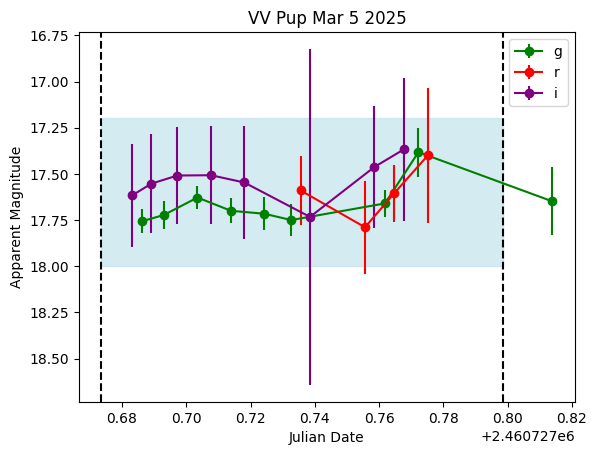

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

# Read in csv file using pandas
results_g = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_g.csv')
results_r = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_r.csv')
results_i = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_i.csv')

#results_z = pd.read_csv('/Users/nathaliehaurberg/Data/SumerMACRO/python_results_z.csv')

# Create DataFrames from the original dictionaries
new_results_g_df = pd.DataFrame({
    'file': results_g['file'],
    'Julian_Date': results_g['Julian_Date'],
    'stlmi_mag_g': results_g['star_5_mag'],
    'stlmi_mag_err_g': results_g['star_5_mag_error'],
})

new_results_r_df = pd.DataFrame({
    'file': results_r['file'],
    'Julian_Date': results_r['Julian_Date'],
    'stlmi_mag_r': results_r['star_5_mag'],
    'stlmi_mag_err_r': results_r['star_5_mag_error'],
})

new_results_i_df = pd.DataFrame({
    'file': results_i['file'],
    'Julian_Date': results_i['Julian_Date'],
    'stlmi_mag_i': results_i['star_5_mag'],
    'stlmi_mag_err_i': results_i['star_5_mag_error'],
})

'''new_results_z_df = pd.DataFrame({
    'file': results_z['file'],
    'Julian_Date': results_z['Julian_Date'],
    'stlmi_mag_z': results_z['star_5_mag'],
    'stlmi_mag_err_z': results_z['star_5_mag_error'],
})'''


#Sort results by Julian Date
results_g = new_results_g_df.sort_values('Julian_Date')
results_r = new_results_r_df.sort_values('Julian_Date')
results_i = new_results_i_df.sort_values('Julian_Date')

t_start = Time('2025-02-21T04:10:00', scale='utc')
# Get the Julian Date
jd_start = t_start.jd

t_end = Time('2025-02-21T07:10:00', scale='utc')
jd_end = t_end.jd

# Plot the relative flux for each filter
plt.errorbar(results_g['Julian_Date'], results_g['stlmi_mag_g'], yerr=results_g['stlmi_mag_err_g'], fmt='o-', label='g', color="green", markersize=6)
plt.errorbar(results_r['Julian_Date'], results_r['stlmi_mag_r'], yerr=results_r['stlmi_mag_err_r'], fmt='o-', label='r', color="red", markersize=6)
plt.errorbar(results_i['Julian_Date'], results_i['stlmi_mag_i'], yerr=results_i['stlmi_mag_err_i'], fmt='o-', label='i', color="purple", markersize=6)
#plt.errorbar(results_y['Julian_Date'], results_y['rel_flux'], yerr=results_y['star_5_relerror'], fmt='o-', label='y', color='red')
#plt.errorbar(results_z['Julian_Date'], results_z['stlmi_mag_z'], yerr=results_z['stlmi_mag_err_z'], fmt='o-', label='z', color='purple', markersize=6)
#plt.scatter(append_results_z_df['Julian_Date'], append_results_z_df['stlmi_mag_z'], marker='s', color='purple', s=50)
plt.axvline(jd_start, color='black', linestyle='--')
plt.axvline(jd_end, color='black', linestyle='--')
# make light blue between the black lines
plt.fill_between([jd_start, jd_end], 18, 17.2, color='lightblue', alpha=0.5)
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.gca().invert_yaxis()
plt.title('VV Pup Mar 5 2025')
plt.legend()
plt.show()
